## **<u> Motivaciones para la elección del dataset </u>**

**<u> Orígen y autoría </u>**

El dataset seleccionado, titulado *'Students Performance Dataset: Academic Success Factors in High School Students'*, ha sido obtenido de Kaggle. El dataset específico se puede encontrar en la URL 'https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset/data', y fue creado por Rabie El Kharoua, quien tiene una amplio abanico de datasets en la plataforma, todos ellos de gran calidad.

**<u> Razones para seleccionar este dataset </u>**

Este dataset es una gran herramienta para explorar y comprender los factores que ingluyen en el rendimiento académico de los estudiantes de secundaria. Poder identificar tales factores no solo enriquece el entendimiento teórico, sino que también tiene aplicaciones prácticas. Como educador esta información puede utilizarse para desarrollar estrategias basadas en datos para promover el éxtio académico de jovenes estudiantes.

**<u> Beneficios y contribuciones esperadas </u>**

El estudio de este dataset proporcionará insights para poder orientar a los estudiantes de manera correcta y efectiva en su trayectoria académica.

**<u> Conclusión </u>**

La elección de este dataset se fundamenta en la necesidad de entender mejor los factores que impulsan el éxito académico entre los estudiantes de secundaria. Este conocimiento no solo tiene aplicaciones teóricas, sino que también tiene el potencial de impactar positivamente en la educación de los jovenes de nuestro entorno.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('./data/Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [82]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [84]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [85]:
df.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## **<u> Descripción de las variables </u>**

<u> Información del estudiante </u>

* **StudentID**: Número de identificación único de cada estudiante (1001 hasta 3392) *(Categórica, nominal, politómica)*

<u> Información demográfica </u>

* **Age**: Edad de los estudiantes en años enteros entre 15 y 18 *(Númerica, discreta, razón)*
* **Gender**: Genero *(Categórica, nominal, dicotómica)*
  * 0 -> hombre 
  * 1 -> mujer
* **Ethnicity**: Étnia de los estudiantes *(Categórica, nominal, politómica)*
  * 0 -> Caucasian
  * 1 -> African American
  * 2 -> Asian
  * 3 -> Other
* **ParentalEducation**: El nivel de educación de los padres *(Categórica, ordinal, politómica)*
  * 0 -> None
  * 1 -> High School
  * 2 -> Some College
  * 3 -> Bachelor's
  * 4 -> Higher

<u> Hábitos de estudio </u>

* **StudyTimeWeekly**: Horas de estudio semanal en horas con decimales entre 0 y 20 *(Númerica, continua, intervalo)*
* **Absences**: Numero de absencias en dias enteros entre 0 y 30 *(Númerica, discreta, razón)*
* **Tutoring**: El alumno esta 'tutoreado' *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si

<u> Participación de los padres </u>

* **ParentalSupport**: Nivel de participación de los padres *(Categórica, ordinal, politómica)*
  * 0 -> None
  * 1 -> Low
  * 2 -> Moderate
  * 3 -> High
  * 4 -> Very High

<u> Actividades extracurriculares </u>

* **Extracurricular**: Participación en actividades extracurriculares *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si
* **Sports**: Práctica de deporte *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si
* **Music**: Práctica de música *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si
* **Volunteering**: Práctica de voluntariado *(Categórica, nominal, dicotómica)*
  * 0 -> No
  * 1 -> Si

<u> Rendimiento académico </u>

* **GPA**: Siglas para 'Grade Point Average' que es la media de una puntuación entre 2.0 y 4.0, influenciada por los hábitos de estudio, la participación de los padres y las actividades extracurriculares *(Númerica, continua, intervalo)*

<u> Variable objetivo </u>

* **GradeClass**: Clasificación de los estudiantes basada en el GPA *(Categórica, ordinal, politómica)*
  * 0 -> 'A' (GPA >= 3.5)
  * 1 -> 'B' (3.0 <= GPA < 3.5)
  * 2 -> 'C' (2.5 <= GPA < 3.0)
  * 3 -> 'D' (2.0 <= GPA < 2.5)
  * 4 -> 'F' (GPA < 2.0)
  


## **<u> Tratamiento de las variables </u>**

#### **Conteo y tasa de alumnos**

In [86]:
# Conteo del numero de alumnos por cada grado
numero_total_alumnos = df['StudentID'].count()
numero_alumnos_por_grado = df['GradeClass'].value_counts().sort_index()
tasa_alumnos_por_grado = (numero_alumnos_por_grado / numero_total_alumnos) * 100

print(f"El número total de alumnos es: {numero_total_alumnos}")
print(f"\nEl numero de alumnos por grado es:\n{numero_alumnos_por_grado}")
print(f"\nLa tasa de alumnos por grado es:\n{tasa_alumnos_por_grado}")

El número total de alumnos es: 2392

El numero de alumnos por grado es:
GradeClass
0.0     107
1.0     269
2.0     391
3.0     414
4.0    1211
Name: count, dtype: int64

La tasa de alumnos por grado es:
GradeClass
0.0     4.473244
1.0    11.245819
2.0    16.346154
3.0    17.307692
4.0    50.627090
Name: count, dtype: float64


#### **Separación de las variables númericas y categóricas**

In [87]:
# Creación de dos variables para separar las variables númericas (y 'GradeClass') y las categóricas
variables_numericas = ['StudyTimeWeekly', 'Absences', 'GPA', 'GradeClass']
df_numericas = df[variables_numericas]

variables_categoricas = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
df_categoricas = df[variables_categoricas]

print(f"Dataframe con las variables númericas:\n{df_numericas}")
print(f"\nDataframe con las variables categóricas:\n{df_categoricas}")

Dataframe con las variables númericas:
      StudyTimeWeekly  Absences       GPA  GradeClass
0           19.833723         7  2.929196         2.0
1           15.408756         0  3.042915         1.0
2            4.210570        26  0.112602         4.0
3           10.028829        14  2.054218         3.0
4            4.672495        17  1.288061         4.0
...               ...       ...       ...         ...
2387        10.680555         2  3.455509         0.0
2388         7.583217         4  3.279150         4.0
2389         6.805500        20  1.142333         2.0
2390        12.416653        17  1.803297         1.0
2391        17.819907        13  2.140014         1.0

[2392 rows x 4 columns]

Dataframe con las variables categóricas:
      Age  Gender  Ethnicity  ParentalEducation  Tutoring  ParentalSupport  \
0      17       1          0                  2         1                2   
1      18       0          0                  1         0                1   
2      15   

## **<u> Gráficos iniciales </u>**

#### **Variables númericas**

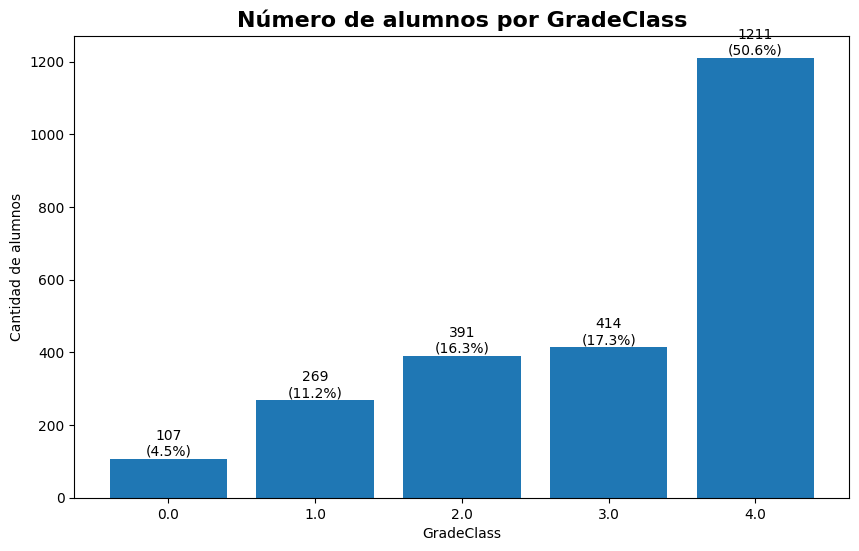

In [88]:
# Gráfico de barras que muestra el número de alumnos en cada grado
plt.figure(figsize=(10, 6))
barras = plt.bar(numero_alumnos_por_grado.index.astype(str), numero_alumnos_por_grado.values)

# Añadir numero y porcentaje encima de cada barra
for barra, grado in zip(barras, numero_alumnos_por_grado.index):
  h = barra.get_height()
  p = tasa_alumnos_por_grado[grado]
  plt.text(barra.get_x() + barra.get_width() / 2, h, f'{h:.0f}\n({p:.1f}%)', ha='center', va='bottom')

plt.xlabel('GradeClass')
plt.ylabel('Cantidad de alumnos')
plt.title('Número de alumnos por GradeClass', fontweight='bold', fontsize=16)

plt.show()

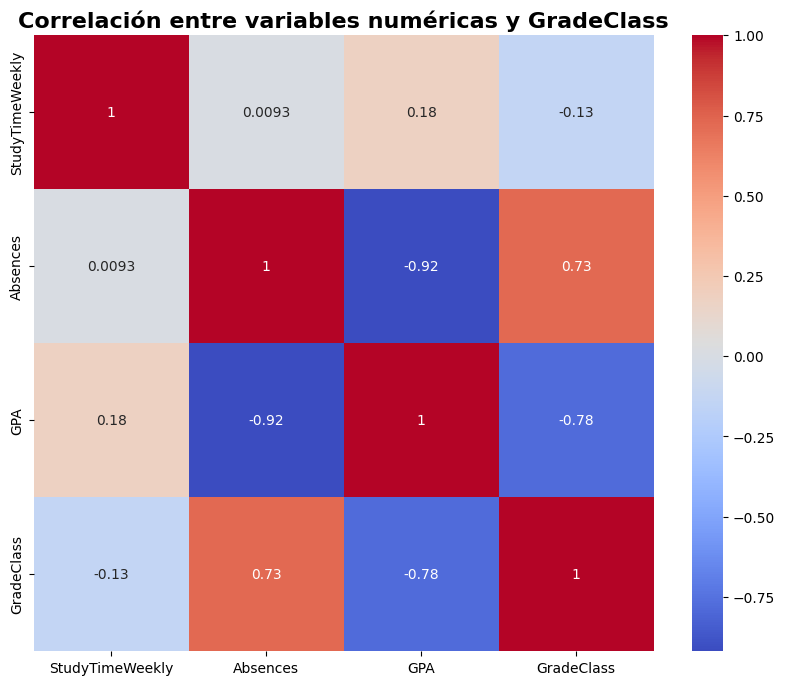

In [89]:
# Gráfico de correlación para las variables númericas vs. GradeClass
plt.figure(figsize=(10, 8))
sns.heatmap(df_numericas.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables numéricas y GradeClass', fontweight='bold', fontsize=16)
plt.show()
# GradeClass presenta una fuerte relación con Absences

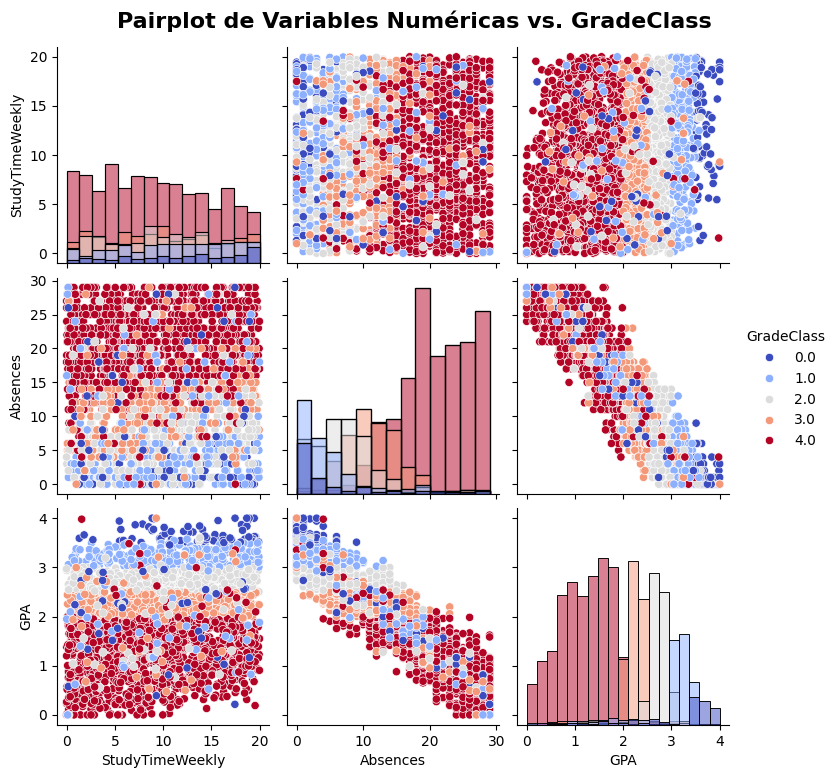

In [90]:
# Crear un pairplot de las variables númericas vs. 'GradeClass'
sns.pairplot(df_numericas, hue='GradeClass', palette='coolwarm', diag_kind='hist')
plt.suptitle('Pairplot de Variables Numéricas vs. GradeClass', y=1.03, fontweight='bold', fontsize=16)
plt.show()

#### **Variables categóricas**

In [91]:
# Crear labels de las variables categoricas para mostrar en los gráficos

# Definir los diccionarios de mapeo
gender_map = {0: 'Hombre', 1: 'Mujer'}
ethnicity_map = {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'}
parental_education_map = {0: 'None', 1: 'High School', 2: 'Some College', 3: "Bachelor's", 4: 'Higher'}
tutoring_map = {0: 'No', 1: 'Si'}
parental_support_map = {0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'}
extracurricular_map = {0: 'No', 1: 'Si'}
sports_map = {0: 'No', 1: 'Si'}
music_map = {0: 'No', 1: 'Si'}
volunteering_map = {0: 'No', 1: 'Si'}

# Copiar el df para no modificar el original
df_graficos = df.copy()
  
# Mapear las variables categóricas
df_graficos['Gender'] = df_graficos['Gender'].map(gender_map)
df_graficos['Ethnicity'] = df_graficos['Ethnicity'].map(ethnicity_map)
df_graficos['ParentalEducation'] = df_graficos['ParentalEducation'].map(parental_education_map)
df_graficos['Tutoring'] = df_graficos['Tutoring'].map(tutoring_map)
df_graficos['ParentalSupport'] = df_graficos['ParentalSupport'].map(parental_support_map)
df_graficos['Extracurricular'] = df_graficos['Extracurricular'].map(extracurricular_map)
df_graficos['Sports'] = df_graficos['Sports'].map(sports_map)
df_graficos['Music'] = df_graficos['Music'].map(music_map)
df_graficos['Volunteering'] = df_graficos['Volunteering'].map(volunteering_map)

# Crear la lista de labels para las variables categóricas
labels_categoricas = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

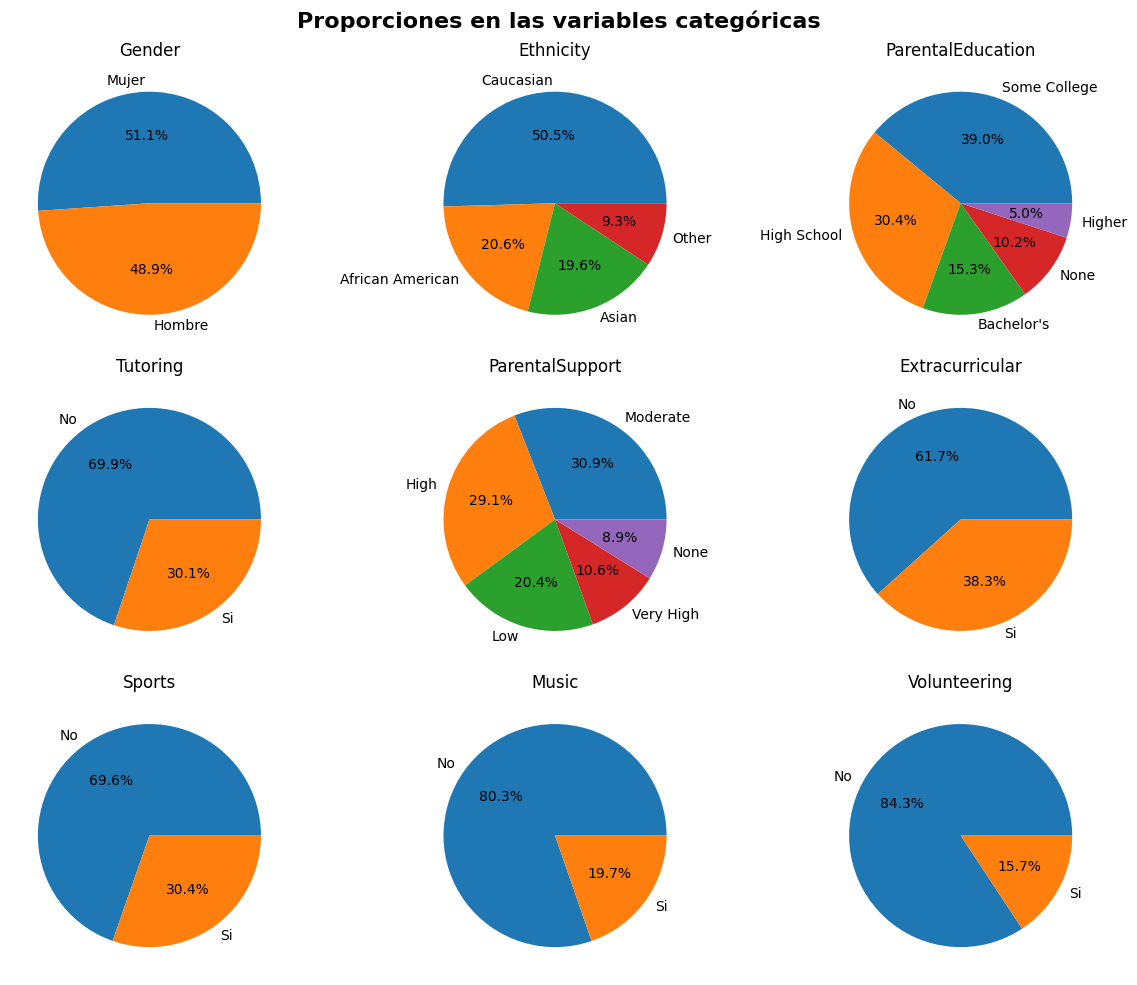

In [92]:
# Crear gráficos de pastel para ver las proporciones de las variables categóricas
fig, ax = plt.subplots(3,3, figsize=(12,10))
fig.suptitle('Proporciones en las variables categóricas', fontweight='bold', fontsize=16)

# Recorrer la lista para ir creando los gráficos
for i, var in enumerate(labels_categoricas):
  fila = i // 3
  col = i % 3
  data = df_graficos[var].value_counts()
  ax[fila, col].pie(data, labels=data.index, autopct='%1.1f%%')
  ax[fila, col].set_title(var)
    
plt.tight_layout()
plt.show()

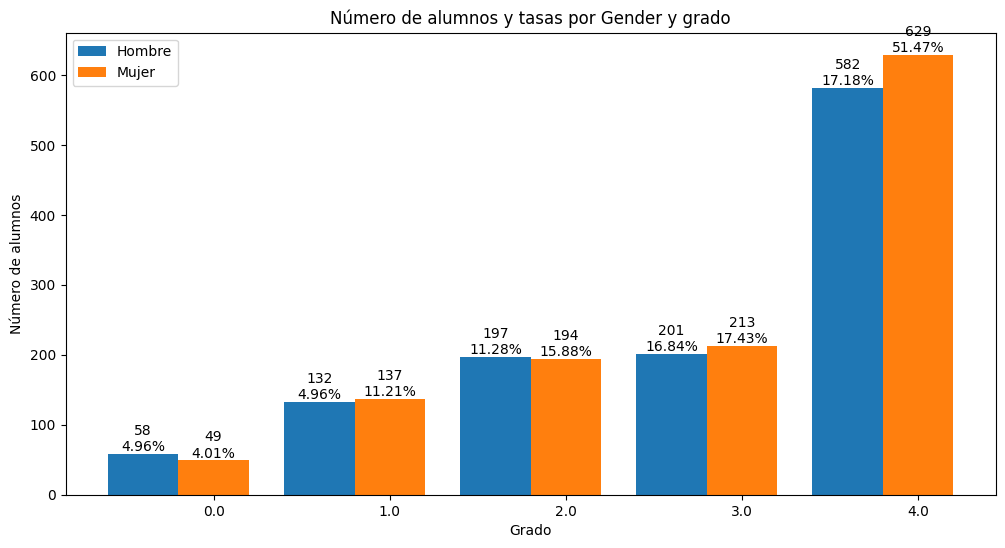

Conteos por grado y Gender
GradeClass  0.0  1.0  2.0  3.0  4.0
Gender                             
Hombre       58  132  197  201  582
Mujer        49  137  194  213  629

Tasas por grado y Gender
GradeClass    0.0     1.0     2.0     3.0     4.0
Gender                                           
Hombre      4.96%  11.28%  16.84%  17.18%  49.74%
Mujer       4.01%  11.21%  15.88%  17.43%  51.47%


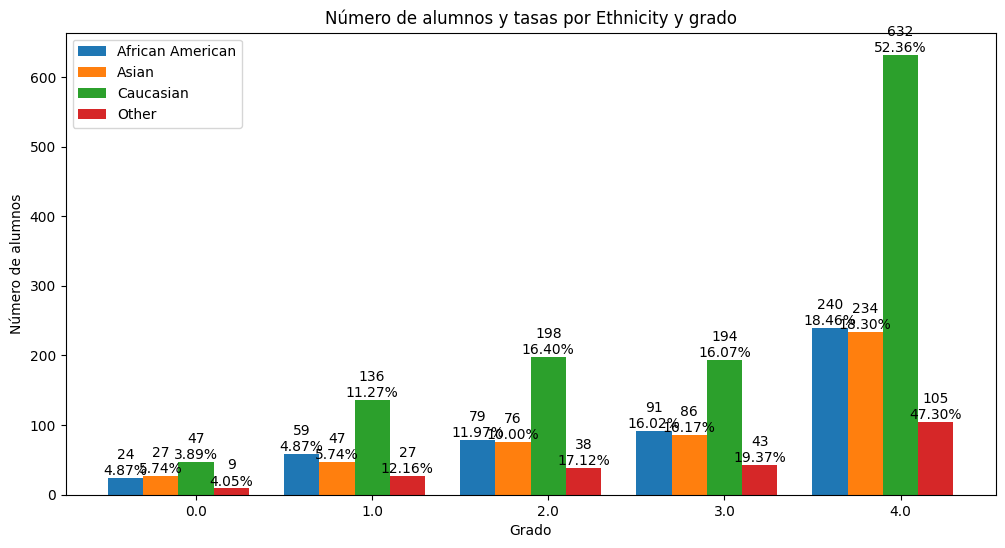

Conteos por grado y Ethnicity
GradeClass        0.0  1.0  2.0  3.0  4.0
Ethnicity                                
African American   24   59   79   91  240
Asian              27   47   76   86  234
Caucasian          47  136  198  194  632
Other               9   27   38   43  105

Tasas por grado y Ethnicity
GradeClass          0.0     1.0     2.0     3.0     4.0
Ethnicity                                              
African American  4.87%  11.97%  16.02%  18.46%  48.68%
Asian             5.74%  10.00%  16.17%  18.30%  49.79%
Caucasian         3.89%  11.27%  16.40%  16.07%  52.36%
Other             4.05%  12.16%  17.12%  19.37%  47.30%


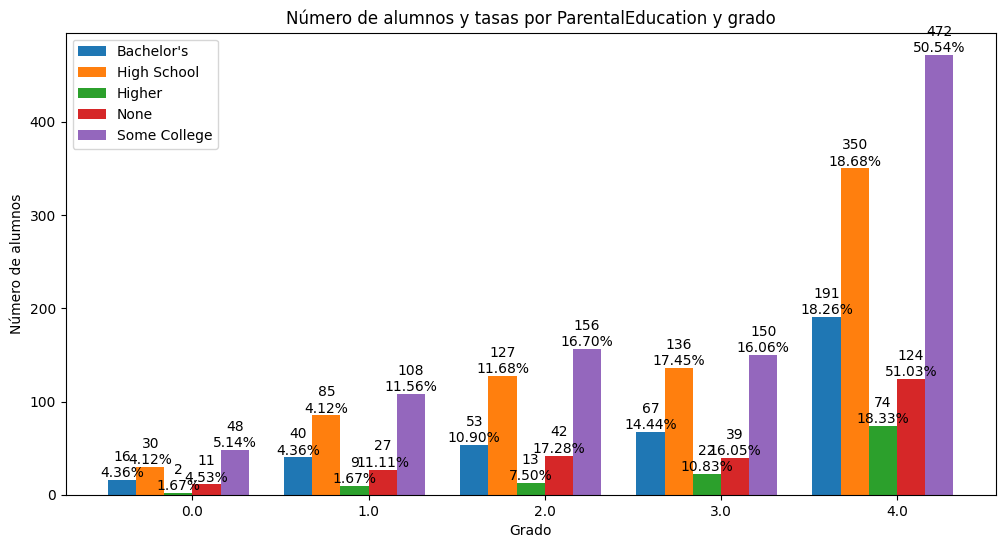

Conteos por grado y ParentalEducation
GradeClass         0.0  1.0  2.0  3.0  4.0
ParentalEducation                         
Bachelor's          16   40   53   67  191
High School         30   85  127  136  350
Higher               2    9   13   22   74
None                11   27   42   39  124
Some College        48  108  156  150  472

Tasas por grado y ParentalEducation
GradeClass           0.0     1.0     2.0     3.0     4.0
ParentalEducation                                       
Bachelor's         4.36%  10.90%  14.44%  18.26%  52.04%
High School        4.12%  11.68%  17.45%  18.68%  48.08%
Higher             1.67%   7.50%  10.83%  18.33%  61.67%
None               4.53%  11.11%  17.28%  16.05%  51.03%
Some College       5.14%  11.56%  16.70%  16.06%  50.54%


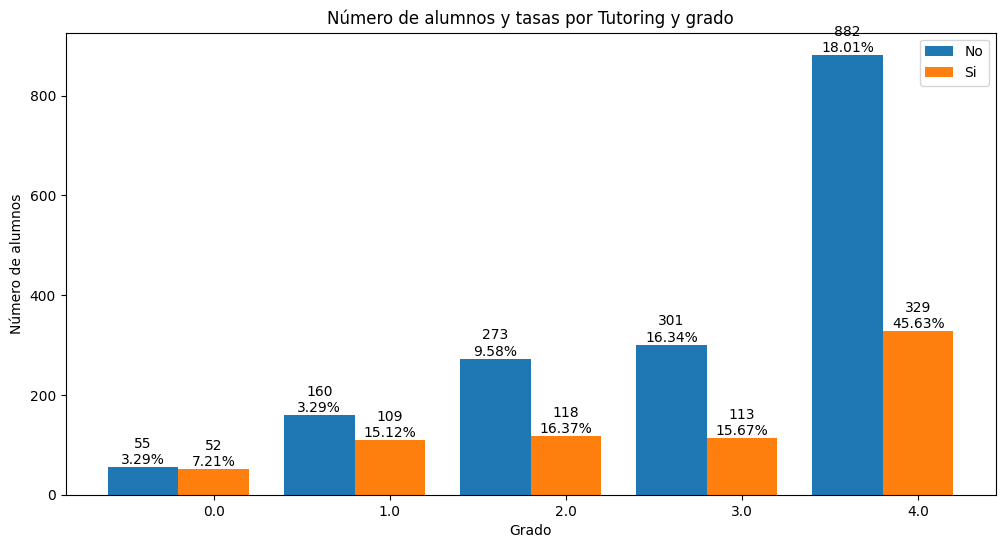

Conteos por grado y Tutoring
GradeClass  0.0  1.0  2.0  3.0  4.0
Tutoring                           
No           55  160  273  301  882
Si           52  109  118  113  329

Tasas por grado y Tutoring
GradeClass    0.0     1.0     2.0     3.0     4.0
Tutoring                                         
No          3.29%   9.58%  16.34%  18.01%  52.78%
Si          7.21%  15.12%  16.37%  15.67%  45.63%


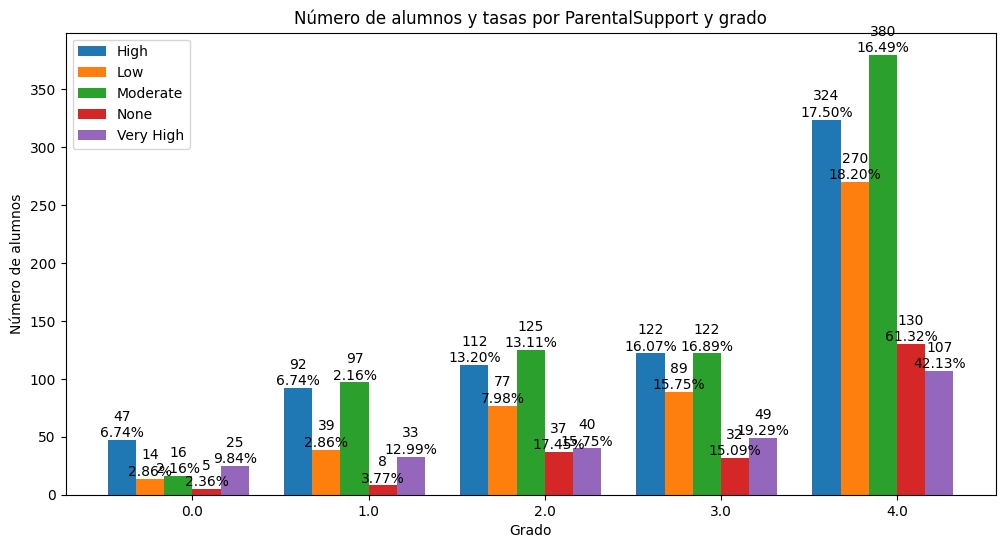

Conteos por grado y ParentalSupport
GradeClass       0.0  1.0  2.0  3.0  4.0
ParentalSupport                         
High              47   92  112  122  324
Low               14   39   77   89  270
Moderate          16   97  125  122  380
None               5    8   37   32  130
Very High         25   33   40   49  107

Tasas por grado y ParentalSupport
GradeClass         0.0     1.0     2.0     3.0     4.0
ParentalSupport                                       
High             6.74%  13.20%  16.07%  17.50%  46.48%
Low              2.86%   7.98%  15.75%  18.20%  55.21%
Moderate         2.16%  13.11%  16.89%  16.49%  51.35%
None             2.36%   3.77%  17.45%  15.09%  61.32%
Very High        9.84%  12.99%  15.75%  19.29%  42.13%


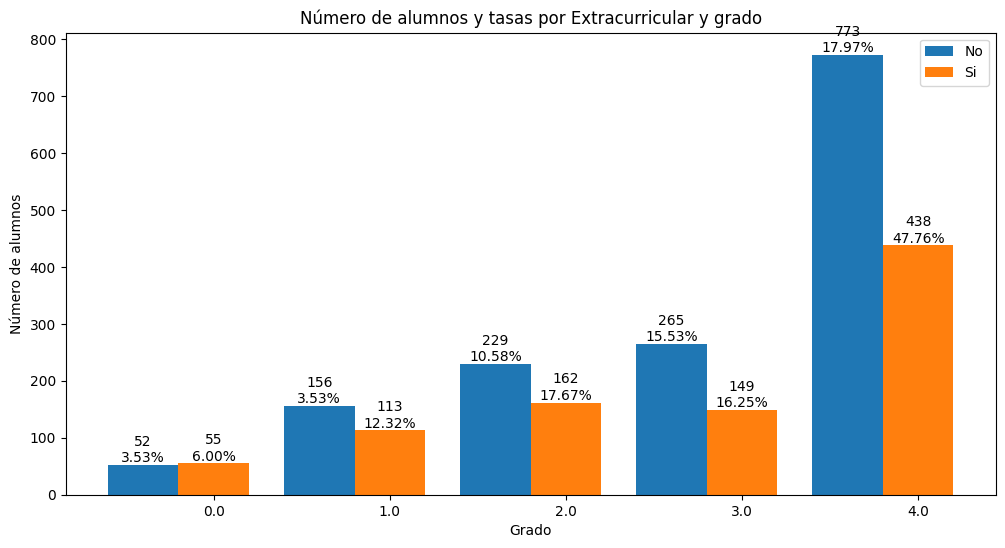

Conteos por grado y Extracurricular
GradeClass       0.0  1.0  2.0  3.0  4.0
Extracurricular                         
No                52  156  229  265  773
Si                55  113  162  149  438

Tasas por grado y Extracurricular
GradeClass         0.0     1.0     2.0     3.0     4.0
Extracurricular                                       
No               3.53%  10.58%  15.53%  17.97%  52.41%
Si               6.00%  12.32%  17.67%  16.25%  47.76%


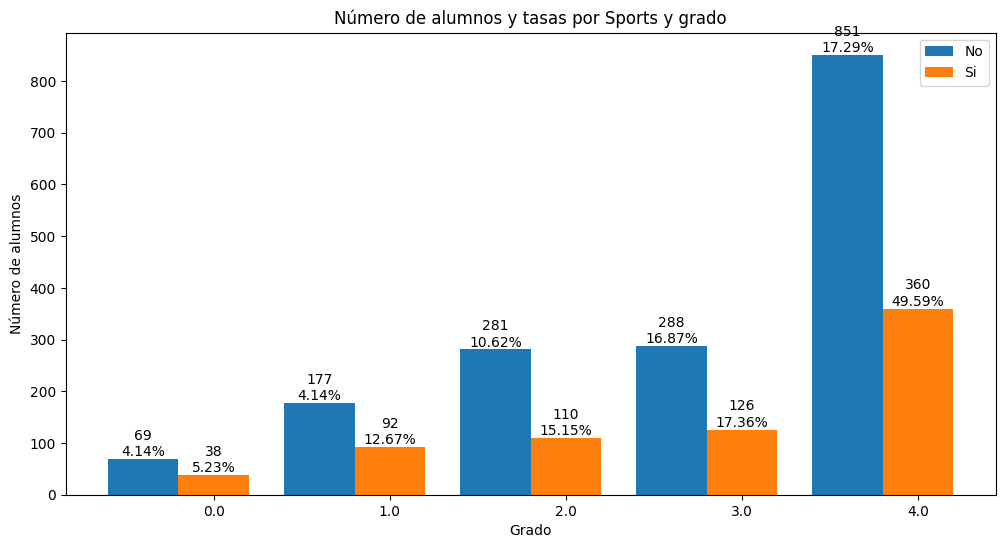

Conteos por grado y Sports
GradeClass  0.0  1.0  2.0  3.0  4.0
Sports                             
No           69  177  281  288  851
Si           38   92  110  126  360

Tasas por grado y Sports
GradeClass    0.0     1.0     2.0     3.0     4.0
Sports                                           
No          4.14%  10.62%  16.87%  17.29%  51.08%
Si          5.23%  12.67%  15.15%  17.36%  49.59%


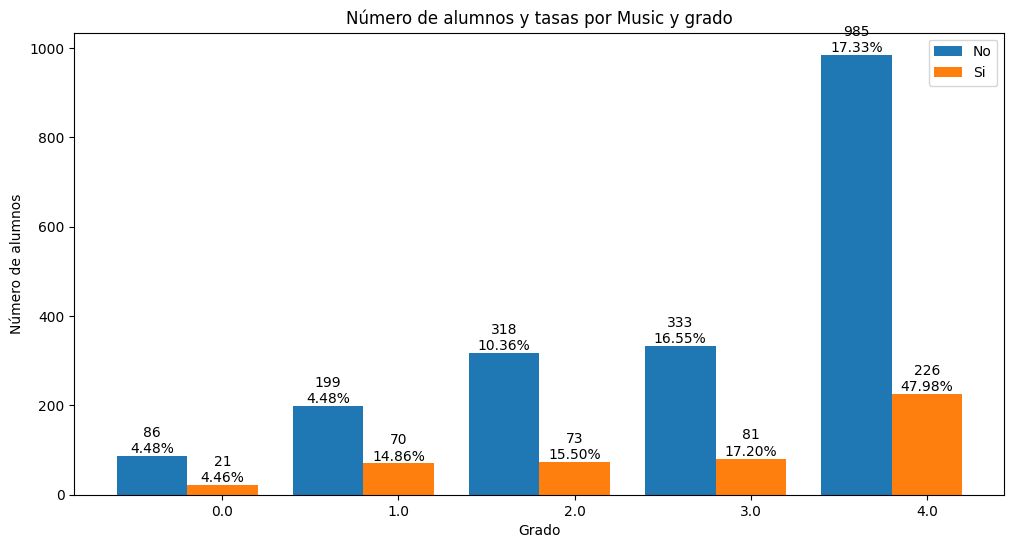

Conteos por grado y Music
GradeClass  0.0  1.0  2.0  3.0  4.0
Music                              
No           86  199  318  333  985
Si           21   70   73   81  226

Tasas por grado y Music
GradeClass    0.0     1.0     2.0     3.0     4.0
Music                                            
No          4.48%  10.36%  16.55%  17.33%  51.28%
Si          4.46%  14.86%  15.50%  17.20%  47.98%


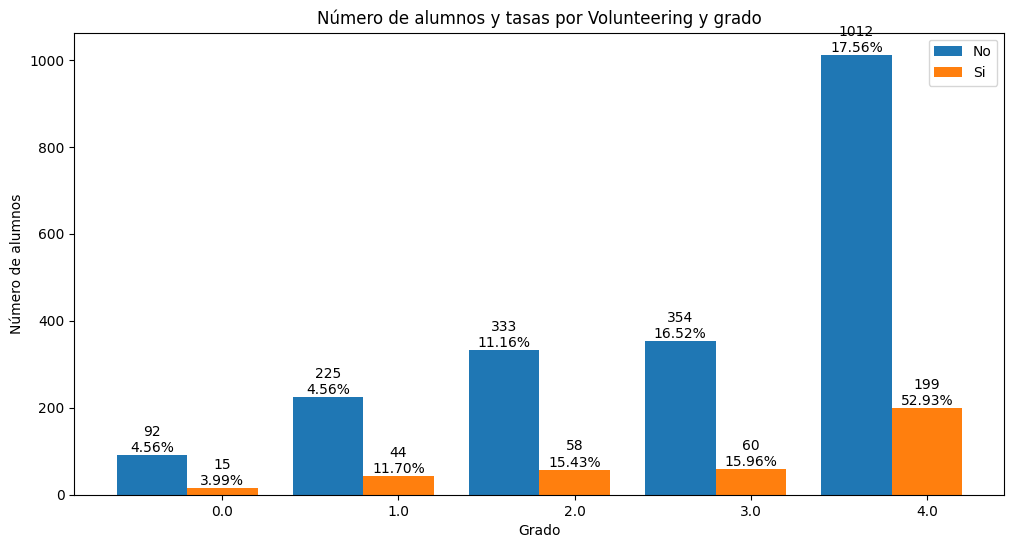

Conteos por grado y Volunteering
GradeClass    0.0  1.0  2.0  3.0   4.0
Volunteering                          
No             92  225  333  354  1012
Si             15   44   58   60   199

Tasas por grado y Volunteering
GradeClass      0.0     1.0     2.0     3.0     4.0
Volunteering                                       
No            4.56%  11.16%  16.52%  17.56%  50.20%
Si            3.99%  11.70%  15.43%  15.96%  52.93%


In [93]:
def generar_graficos(df, categoria):
  total_por_categoria = df.groupby(categoria).size() # Calcular total por categoria
  
  total_categoria_por_grado = df.groupby([categoria, 'GradeClass']).size().unstack() # Conteo de cada categoria por grado
  
  df_conteo = total_categoria_por_grado.copy() # df para almacenar coneto
  df_tasa = pd.DataFrame(index=total_categoria_por_grado.index, columns=total_categoria_por_grado.columns) # df para almacenar tasa
  
  # Llenar df con conteos y tasas
  for grado in total_categoria_por_grado.columns:
    for cat in total_categoria_por_grado.index:
      conteo = total_categoria_por_grado.loc[cat, grado]
      total = total_por_categoria[cat]
      tasa = (conteo / total) * 100
      df_tasa.loc[cat, grado] = f'{tasa:.2f}%'
      
  fig, ax = plt.subplots(figsize=(12,6))
  
  # Posición y ancho de las barras
  num_categorias = len(df_conteo.index)
  bar_width = 0.8 / num_categorias  # Ajuste dinámico del ancho de las barras según el número de categorias
  index = np.arange(len(df_conteo.columns))
  
  for i, cat in enumerate(df_conteo.index):
    bars = ax.bar(index + (i - num_categorias / 2) * bar_width, df_conteo.loc[cat], bar_width, label=cat)
    
    # Añadir etiquetas encima de las barras
    for bar in bars:
      height = bar.get_height()
      grado = int(bar.get_x() + bar.get_width() / 2 - index[0])
      tasa = df_tasa.loc[cat, df_conteo.columns[grado]]
      ax.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height)}\n{tasa}', ha='center', va='bottom')
    
  ax.set_xlabel('Grado')
  ax.set_ylabel('Número de alumnos')
  ax.set_title(f'Número de alumnos y tasas por {categoria} y grado')
  ax.set_xticks(index)
  ax.set_xticklabels(df_conteo.columns)
  ax.legend()
  
  plt.show()
  
  print(f"Conteos por grado y {categoria}")
  print(df_conteo)
  print(f"\nTasas por grado y {categoria}")
  print(df_tasa)
  
  # Iterar sobre cada variable categórica y generar gráficos
for categoria in labels_categoricas:
  generar_graficos(df_graficos, categoria)

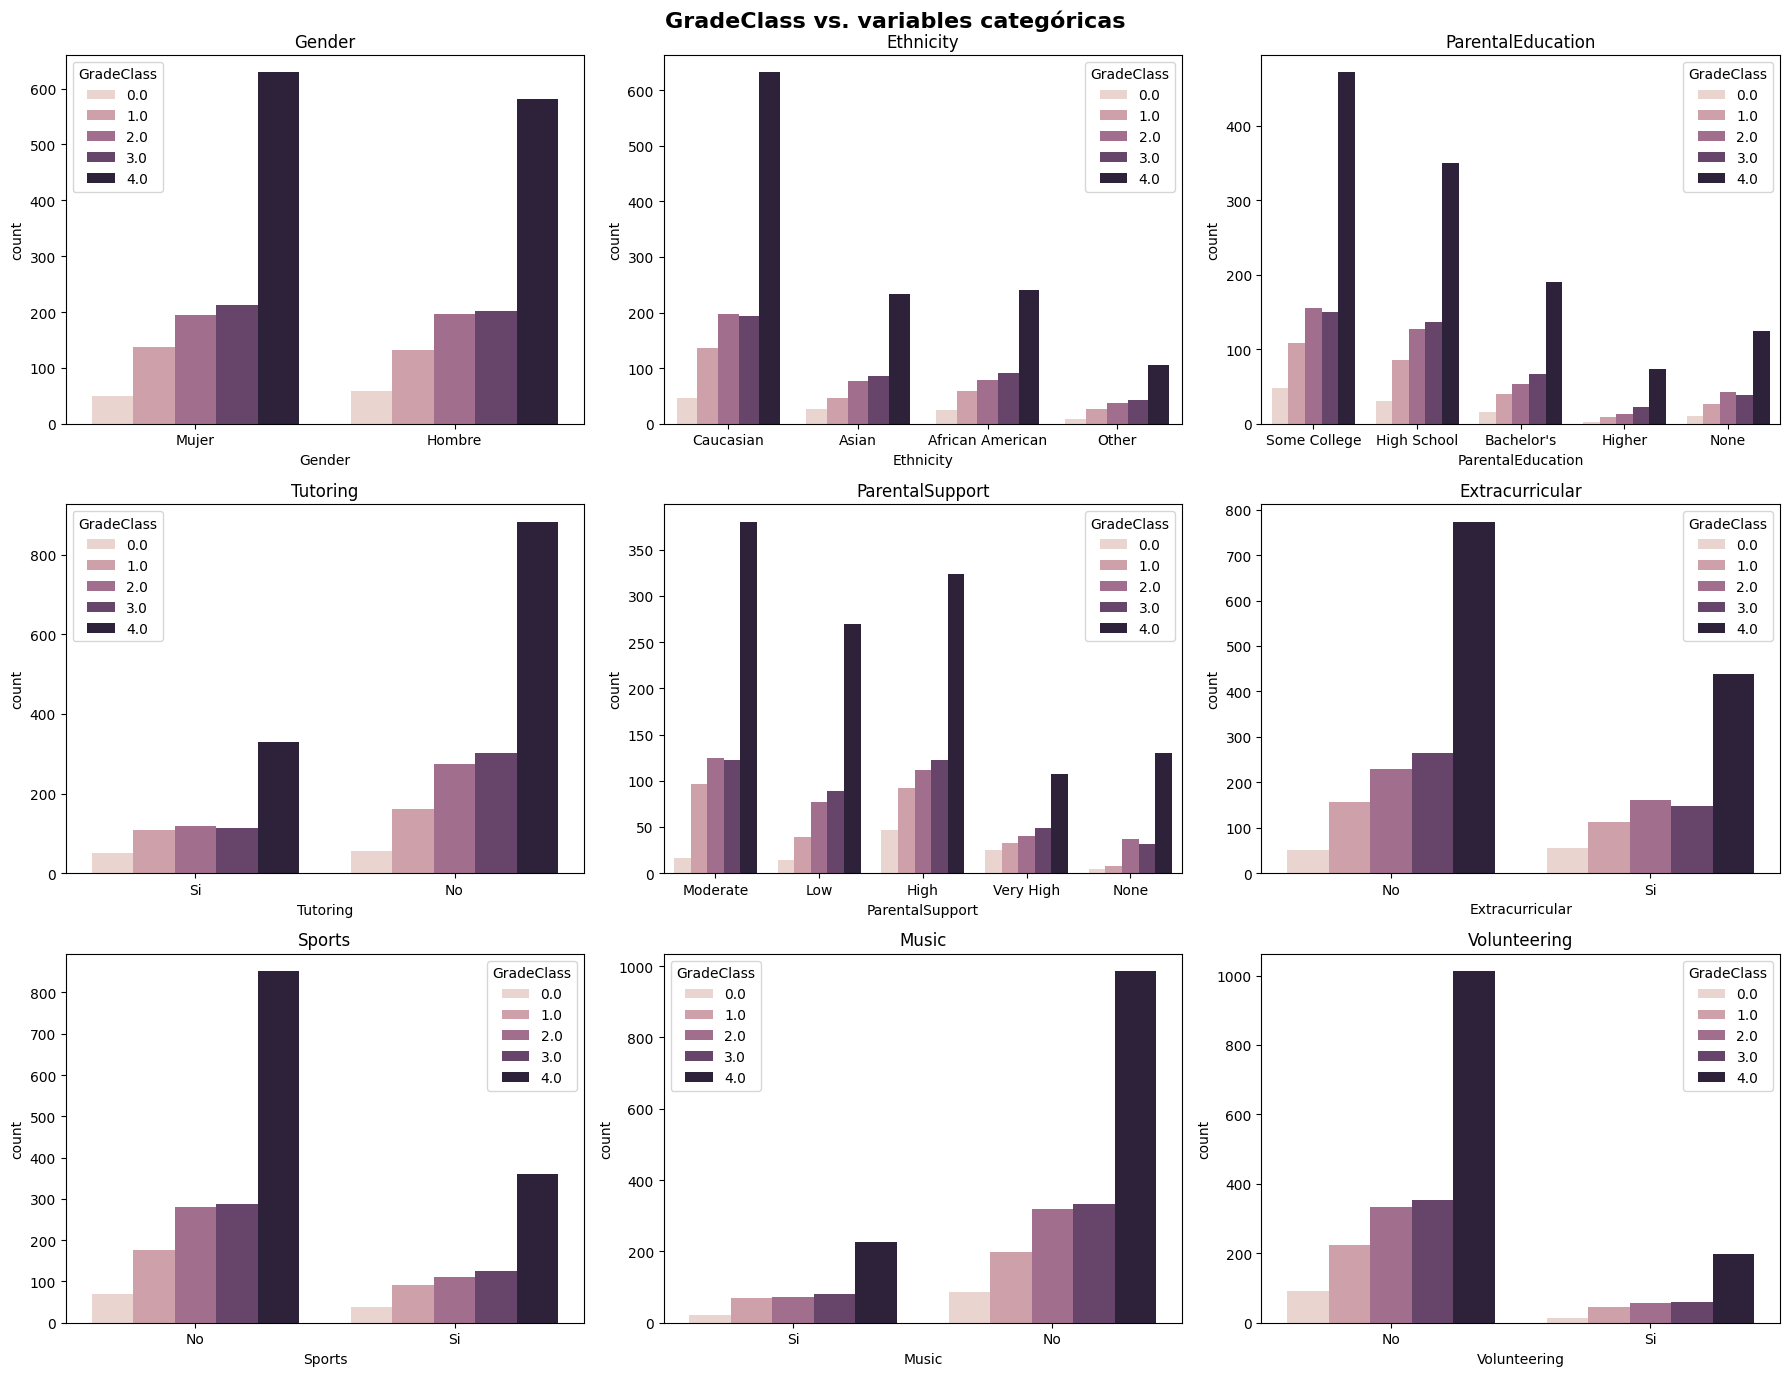

In [94]:
# Crear gráficos de barras para ver las proporciones de cada grado de las variables categóricas
fig, ax = plt.subplots(3,3, figsize=(18,14))
fig.suptitle('GradeClass vs. variables categóricas', fontweight='bold', fontsize=16)

# Recorrer la lista para ir creando los gráficos
for i, var in enumerate(labels_categoricas):
  fila = i // 3
  col = i % 3
  sns.countplot(x=var, hue='GradeClass', data=df_graficos, ax=ax[fila, col])
  ax[fila, col].set_title(var)
      
plt.tight_layout()
plt.show()